# Himanshu Tripathi

## IPL DATA ANALYSIS

##### Questions:
##### How many matches we’ve got in the dataset?
##### How many seasons we’ve got in the dataset?
##### Which Team had won by maximum runs?
##### Which Team had won by maximum wicket?
##### Which Team had won by closest Margin (minimum runs)?
##### Which Team had won by minimum wicket?
##### Which Season had most number of matches?
##### Which IPL Team is more successful?
##### Has Toss-winning helped in winning matches?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14,8)

In [4]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.shape

(636, 18)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [100]:
len(matches['team1'].unique())

14

### How many matches we've got in the dataset

In [71]:
matches['id'].max()

636

### How many seasons we've got in the dataset

In [11]:
matches['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [13]:
len(matches['season'].unique())

10

### Which team had won by maximun runs?

Pandas dataframe.idxmax() function returns index of first occurrence of maximum over requested axis. While finding the index of the maximum value across any index, all NA/null values are excluded.

In [34]:
matches.iloc[matches['win_by_runs'].idxmax()]
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### Which Team had won by maximum wickets?

In [36]:
matches.iloc[matches['win_by_wickets'].idxmax()]
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Which Team had won by (closest margin) minimum runs?

In [86]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [98]:
matches.iloc[matches['win_by_runs']].max()

id                                 147
season                            2017
city                            Rajkot
date                        2017-05-21
team1              Sunrisers Hyderabad
team2              Sunrisers Hyderabad
toss_winner        Sunrisers Hyderabad
toss_decision                    field
result                             tie
dl_applied                           0
winner             Sunrisers Hyderabad
win_by_runs                        146
win_by_wickets                      10
player_of_match           Yuvraj Singh
venue                 Wankhede Stadium
umpire3                            NaN
dtype: object

### Which Team had won by minimum wickets?

In [43]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Which season had most number of matches?

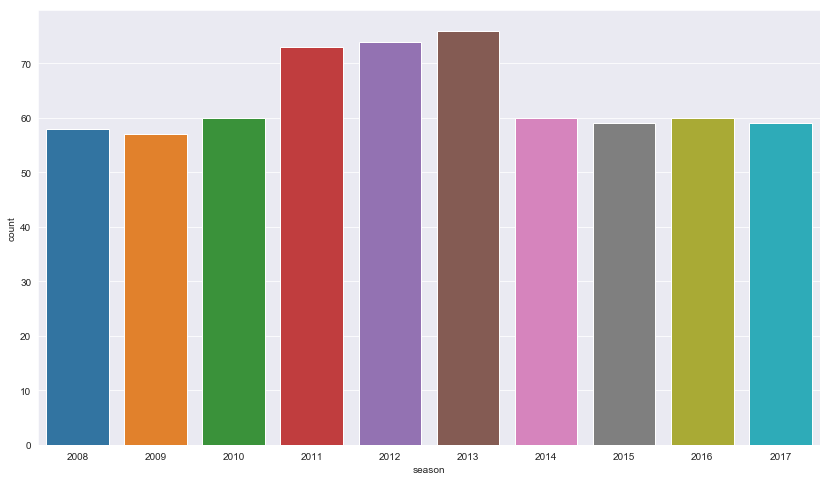

In [44]:
sns.countplot(x='season',data=matches)

### The most successful IPL Team

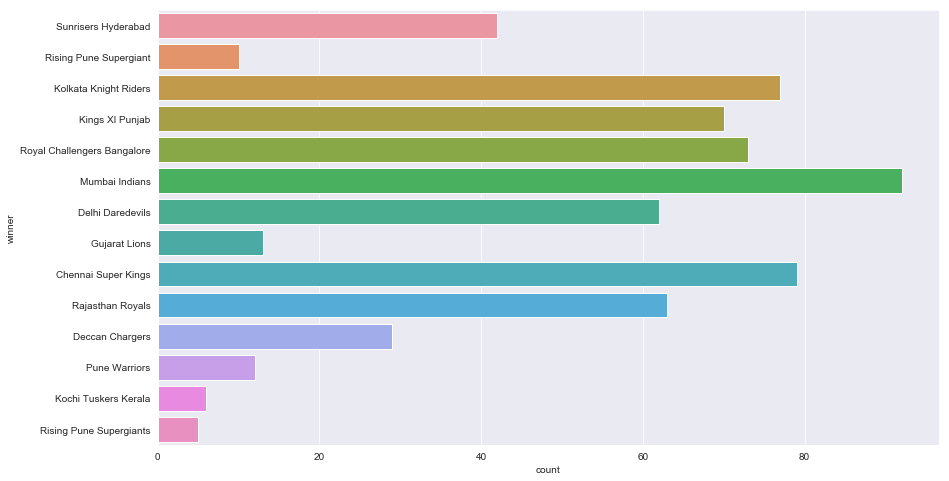

In [46]:
sns.countplot(y='winner',data=matches)

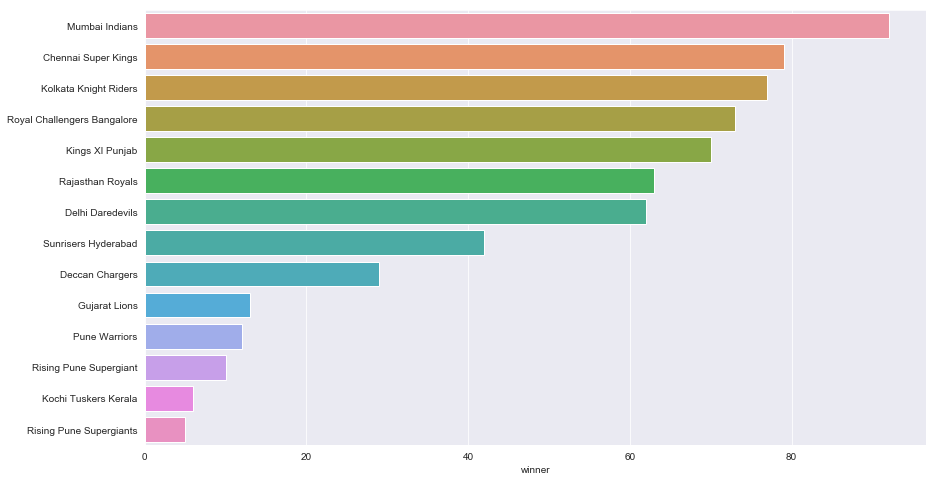

In [47]:
data = matches.winner.value_counts()
sns.barplot(y=data.index,x=data)

### Top player of the matches winners

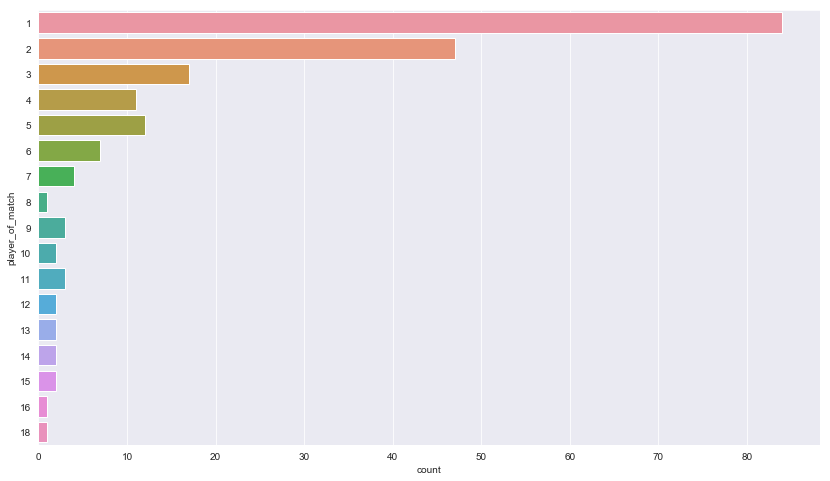

In [62]:
player_of_match = matches['player_of_match'].value_counts()
sns.countplot(y=player_of_match,data=matches)

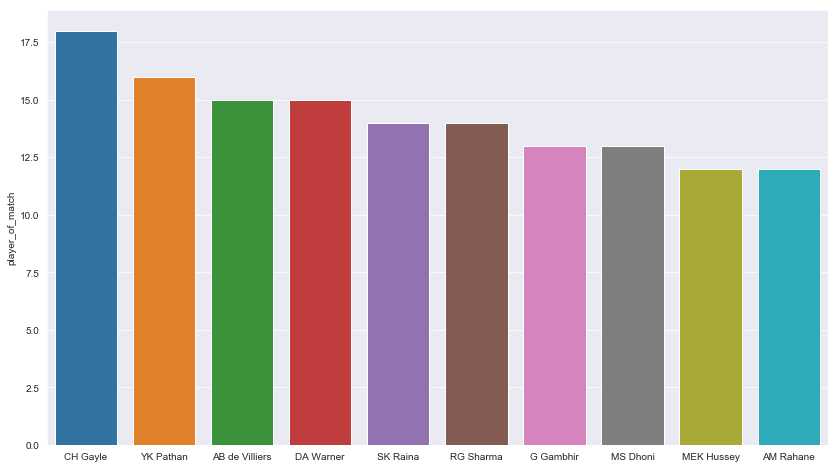

In [64]:
sns.barplot(x=player_of_match[:10].index,y=player_of_match[:10])

### Has Toss-winning helped in Match-winning?

In [104]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

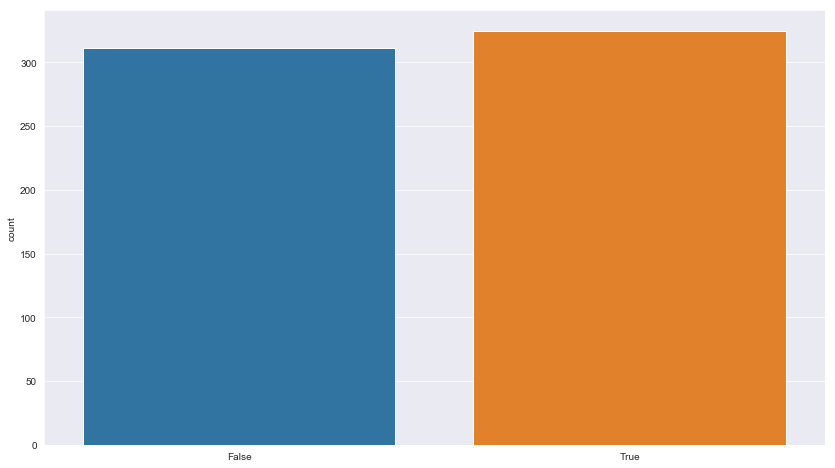

In [68]:
sns.countplot(ss)